<a href="https://colab.research.google.com/github/liumOazed/Forecasting/blob/main/TBATS_Weekly_Store_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tbats

In [ ]:
%cd /content/drive/MyDrive/Forecasting/4. TBATS

/content/drive/MyDrive/Forecasting/4. TBATS


In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("daily-footfall.csv", index_col="WeekBeginning")

In [ ]:
df.head()

,AveragePerDay
WeekBeginning,
3/1/2016,235
10/1/2016,231
17/01/2016,233
24/01/2016,224
31/01/2016,224


In [ ]:
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df.head()

,AveragePerDay
WeekBeginning,
2016-01-03,235
2016-01-10,231
2016-01-17,233
2016-01-24,224
2016-01-31,224


In [ ]:
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

In [ ]:
df = df.rename(columns={"AveragePerDay":"y"})

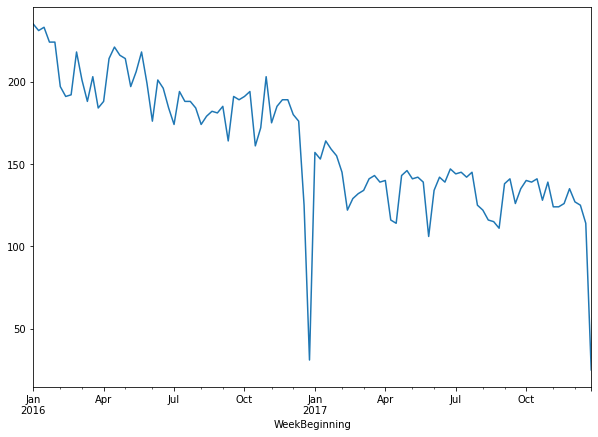

In [ ]:
df['y'].plot(figsize=(10,7))

In [ ]:
# Training and testing
weeks = 5
training_set = df.iloc[: - weeks, :]
test_set = df.iloc[-weeks:, :]
test_set

,y
WeekBeginning,
2017-11-26,135.0
2017-12-03,127.0
2017-12-10,125.0
2017-12-17,114.0
2017-12-24,25.0


In [ ]:
df = df.fillna(method ='ffill')

In [ ]:
training_set.head()

,y
WeekBeginning,
2016-01-03,235.0
2016-01-10,231.0
2016-01-17,233.0
2016-01-24,224.0
2016-01-31,224.0


In [ ]:
# TBATS model
from tbats import TBATS
model = TBATS(seasonal_periods=[52])
model = model.fit(training_set['y']) 

In [ ]:
#predictions
prediction_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
prediction_tbats.index = test_set.index
prediction_tbats

WeekBeginning
2017-11-26    142.421047
2017-12-03    149.637739
2017-12-10    111.377062
2017-12-17     51.804944
2017-12-24     39.879864
Freq: W-SUN, Name: TBATS, dtype: float64

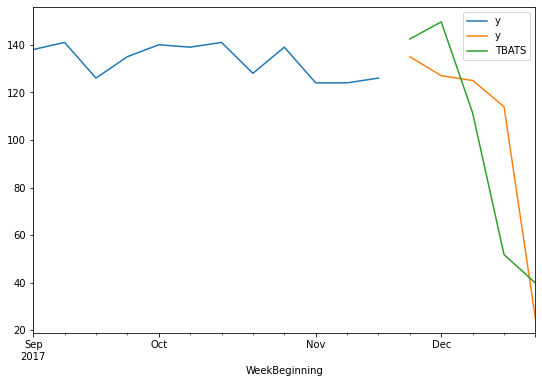

In [ ]:
#visualization
training_set['y']['2017-09-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
prediction_tbats.plot(legend = True)

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(np.sqrt(mean_squared_error(test_set['y'], prediction_tbats)),0))

31.0
